In [1]:
! pip install -U scikit-learn
! pip install matplotlib
! pip install pandas
! pip install numpy
! pip install scikit-plot
! pip install scipy==1.11.4

In [2]:
import pickle
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scikitplot as skplt

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

## Load in Data

### TF-IDF

In [4]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/tfidf_data.pkl', 'rb') as f:
    tfidf_data = pickle.load(f)

X_train_tfidf = tfidf_data['X_train']
X_test_tfidf = tfidf_data['X_test']
y_train_tfidf = tfidf_data['y_train']
y_test_tfidf = tfidf_data['y_test']
vectorizer_tfidf = tfidf_data['vectorizer']

### Count Vectorizer

In [5]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/count_data.pkl', 'rb') as f:
    count_data = pickle.load(f)

X_train_count = count_data['X_train']
X_test_count = count_data['X_test']
y_train_count = count_data['y_train']
y_test_count = count_data['y_test']
vectorizer_count = count_data['vectorizer']

## Training (TF-IDF)

In [6]:
max_depths = [3, 10, 15, 20, 30, 50]

In [7]:
acc_tfidfs = []
preds_tfidfs = {3: None, 10: None, 15: None, 20: None, 50: None}
for max_depth in [3, 10, 15, 20, 30, 50]:
    dt_tfidf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_tfidf.fit(tfidf_data['X_train'], tfidf_data['y_train']['toxic'])
    pred_tfidf = dt_tfidf.predict(tfidf_data['X_test'])
    preds_tfidfs[max_depth] = pred_tfidf
    acc_tfidf = accuracy_score(tfidf_data['y_test']['toxic'], pred_tfidf)
    acc_tfidfs.append(acc_tfidf)

## Training (Count Vectorization)

In [8]:
acc_counts = []
preds_counts = {3: None, 10: None, 15: None, 20: None, 50: None}
for max_depth in [3, 10, 15, 20, 30, 50]:
    dt_count = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_count.fit(count_data['X_train'], count_data['y_train']['toxic'])
    pred_count = dt_tfidf.predict(count_data['X_test'])
    preds_counts[max_depth] = pred_count
    acc_count = accuracy_score(count_data['y_test']['toxic'], pred_count)
    acc_counts.append(acc_count)

# Testing Visualization

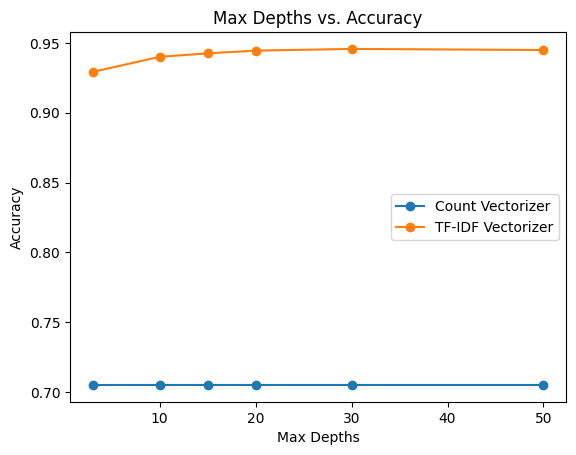

In [9]:
plt.plot([3, 10, 15, 20, 30, 50], acc_counts, marker='o', label='Count Vectorizer')
plt.plot([3, 10, 15, 20, 30, 50], acc_tfidfs, marker='o', label='TF-IDF Vectorizer')
plt.title("Max Depths vs. Accuracy")
plt.xlabel("Max Depths")
plt.ylabel("Accuracy")
plt.legend()

In [10]:
print(f"Best depth: {max_depths[np.argmax(acc_counts)]}")
print(f"Best depth: {max_depths[np.argmax(acc_tfidfs)]}")

Best depth: 3
Best depth: 30


In [11]:
print(f"F1 Score Count Vectorization:  {f1_score(count_data['y_test']['toxic'], preds_counts[max_depths[np.argmax(acc_counts)]])}")
print(f"F1 Score TFIDF:  {f1_score(tfidf_data['y_test']['toxic'], preds_tfidfs[max_depths[np.argmax(acc_tfidfs)]])}")

F1 Score Count Vectorization:  0.3183892228579706
F1 Score TFIDF:  0.6536234777400679


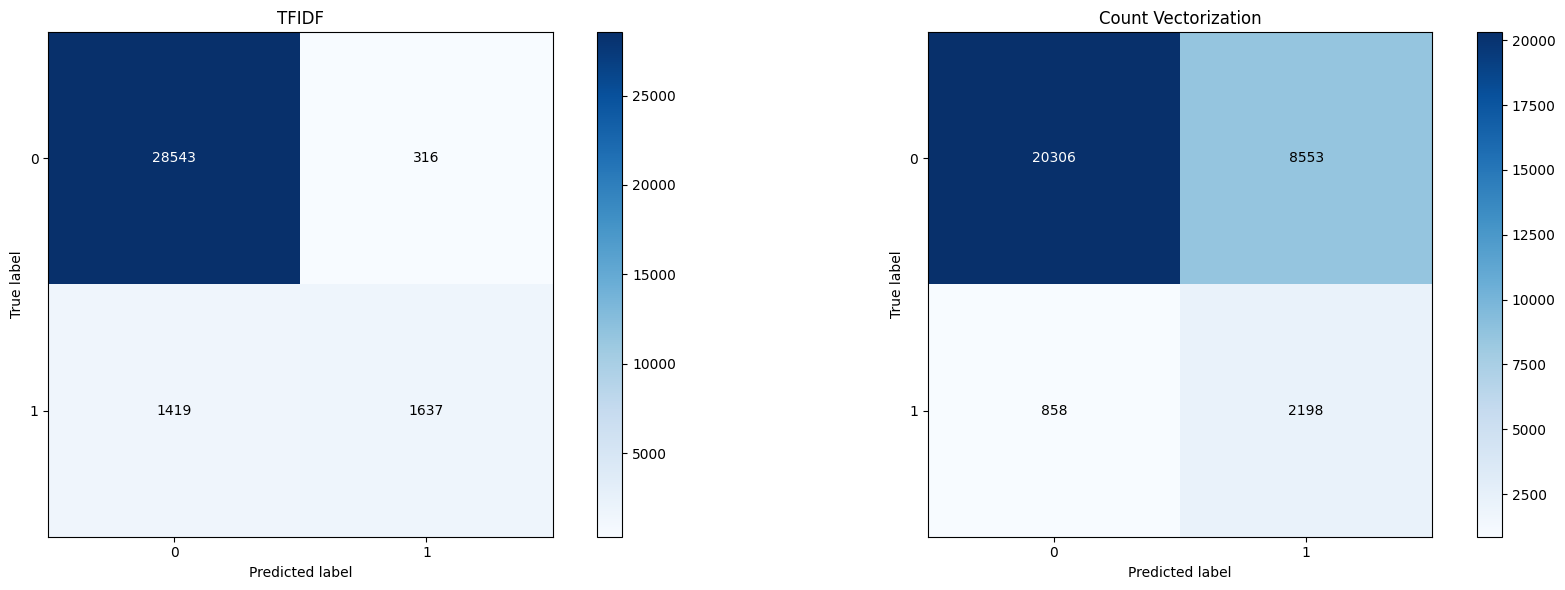

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

skplt.metrics.plot_confusion_matrix(tfidf_data['y_test']['toxic'], preds_tfidfs[max_depths[np.argmax(acc_tfidfs)]], ax=axes[0])
axes[0].set_title("TFIDF")

skplt.metrics.plot_confusion_matrix(count_data['y_test']['toxic'], preds_counts[max_depths[np.argmax(acc_counts)]], ax=axes[1])
axes[1].set_title("Count Vectorization")
plt.tight_layout()
plt.show()